In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# File to Load
file_to_load = "merged_data.csv"

# Read CSV File and store into Pandas data frame
anx_data = pd.read_csv(file_to_load)
anx_data

,Unnamed: 0,date,state,cases,deaths,mental disorder,frequency of mental disorder
0,0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6
1,1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6
2,2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3
3,3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2
4,4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7
...,...,...,...,...,...,...,...
4126,4126,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9
4127,4127,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3
4128,4128,3/17/2021,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2
4129,4129,3/17/2021,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1


In [90]:
mean_cases = anx_data.groupby('state').mean()["cases"]
mean_deaths = anx_data.groupby('state').mean()["deaths"]
mean_mental_disorder=anx_data.groupby('state').mean()["frequency of mental disorder"]
mean_mental_disorder

summary_stats_df = pd.DataFrame({"Cases": mean_cases, "Deaths":mean_deaths, "Anxiety":mean_mental_disorder})
summary_stats_df

,Cases,Deaths,Anxiety
state,,,
Alabama,173986.93,3081.56,32.50
Alaska,17893.78,86.26,31.64
Arizona,270854.52,5512.00,33.49
Arkansas,106179.48,1719.15,34.32
California,1112001.52,17291.15,34.83
Colorado,141365.33,2698.22,32.43
Connecticut,100530.33,4809.78,31.12
Delaware,30036.11,665.48,29.08
District of Columbia,17822.00,622.56,32.24


In [96]:
summary_stats_df.reset_index(inplace=True)
summary_stats_df["state"]

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

          state          Cases        Deaths    Anxiety
42    Tennessee  253641.740741   3404.703704  32.632099
13     Illinois  443956.703704  10606.518519  32.427160
49    Wisconsin  212937.814815   2400.481481  27.592593
24  Mississippi  107451.629630   2767.629630  36.120988
0       Alabama  173986.925926   3081.555556  32.496296
30   New Jersey  311223.296296  15704.000000  32.035802
9       Florida  696438.518519  12442.814815  33.549383
23    Minnesota  168347.629630   2726.444444  27.083951
17     Kentucky  122408.814815   1630.555556  33.938272
47   Washington  120976.777778   2326.259259  32.939506


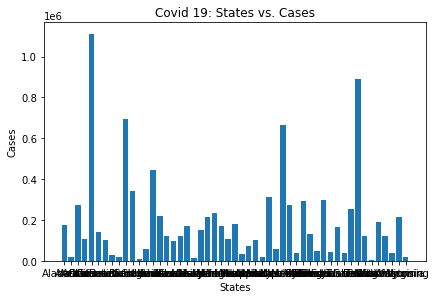

In [119]:
sample_df = summary_stats_df.sample(n=10, random_state=2)
print(sample_df)
x_axis=summary_stats_df["state"]
y_axis=summary_stats_df["Cases"]
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.title("Covid 19: States vs. Cases")
plt.xlabel("States")
plt.ylabel("Cases")
plt.show()

          state          Cases        Deaths    Anxiety
42    Tennessee  253641.740741   3404.703704  32.632099
13     Illinois  443956.703704  10606.518519  32.427160
49    Wisconsin  212937.814815   2400.481481  27.592593
24  Mississippi  107451.629630   2767.629630  36.120988
0       Alabama  173986.925926   3081.555556  32.496296
30   New Jersey  311223.296296  15704.000000  32.035802
9       Florida  696438.518519  12442.814815  33.549383
23    Minnesota  168347.629630   2726.444444  27.083951
17     Kentucky  122408.814815   1630.555556  33.938272
47   Washington  120976.777778   2326.259259  32.939506


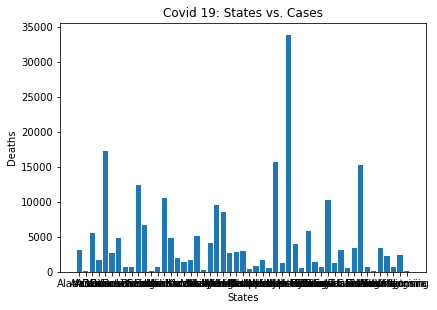

In [121]:
sample_df = summary_stats_df.sample(n=10, random_state=2)
print(sample_df)
x_axis=summary_stats_df["state"]
y_axis=summary_stats_df["Deaths"]
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.title("Covid 19: States vs. Cases")
plt.xlabel("States")
plt.ylabel("Deaths")
plt.show()

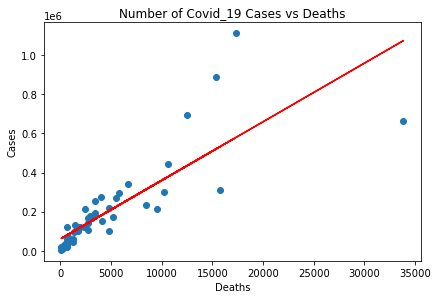

The r-value is: 0.6600119948260404


In [109]:
x_axis=summary_stats_df["Deaths"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Deaths")
plt.xlabel("Deaths")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [ ]:
# There is a high correlation in the number of Covid 19 Cases to the number of Deaths. This means that there is a direct
# impact to the number of deaths as a result of Covid 19 infection cases.
# Based on the data, we can claim that there is a positive correlation between Cases vs. Deaths
# Further analysis will help to determine if there is covid impact/affect on anxiety (mental health).

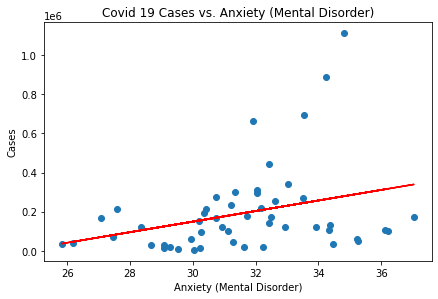

The r-value is: 0.09891456059949644


In [113]:
x_axis=summary_stats_df["Anxiety"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Anxiety (Mental Disorder)")
plt.xlabel("Anxiety (Mental Disorder)")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [ ]:
# There is correlation between Covid 19 Cases vs. Anxiety (Mental Disorder) but not high as the number of Deaths. This means that there is a direct
# impact to Anxiety (Mental Disorder) as a result of Covid 19 infection cases.
# Based on the data, we can claim that there is a positive correlation  of Covid 19 Cases vs. Anxiety (Mental Disorder).

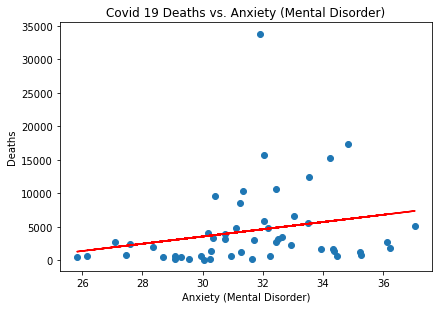

The r-value is: 0.05416342021286422


In [112]:
x_axis=summary_stats_df["Anxiety"]
y_axis=summary_stats_df["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Deaths vs. Anxiety (Mental Disorder)")
plt.xlabel("Anxiety (Mental Disorder)")
plt.ylabel("Deaths")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [ ]:
# There is correlation between Covid 19 Deaths vs. Anxiety (Mental Disorder) but this is lower than when compared to the number of Cases. 
# There is an impact/affect to Anxiety (Mental Disorder) as a result of Covid 19 infection deaths.
# We can determine that there is positive correlation  of Covid 19 Cases vs. Anxiety (Mental Disorder) based on the data.